<a href="https://colab.research.google.com/github/halilergul1/Customer-Segmentation-With-RFM/blob/main/Customer_Segmentation_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preperation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data = pd.read_excel("Online_Retail.xlsx")

In [3]:
data.head() # This is a transaction dataset apperant by its unit of level. Every entry corresponds to a different transaction

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
# Here is the useful features I have.
data.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
data.dtypes 

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
data['Description'].isnull().value_counts()
data['Description'].isnull().sum() * 100 / len(data)

0.2683107311375157

In [ ]:
def missing(dff):
  print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

missing(data)

CustomerID     24.93
Description     0.27
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64


**Missing values** appear only in two columns: CustomerID and Description of product. It would be meaningless to fill NAs of customerid and description features with an aggreagated value as they are not meaningful measures for our purpose. But because customerids are important for segmentation, this problem should be handled.

I prefer **dropping** missing values altogether since we still end up having a large dataset for clustering.

Original data set has 541909 entries. After dropping we have **406829** observations

In [4]:
data = data.dropna()

In [5]:
data.describe() #Some quantity entries are lower than 0, this should be handled first hand

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [6]:
# Data column should be converted to pandas datetime for analytical purposes
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)

data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
# there remained no missing data
def missing(dff):
  print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

missing(data)

data['CustomerID'].isnull().value_counts()

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64


False    406829
Name: CustomerID, dtype: int64

In [ ]:
len(data)
data["StockCode"].nunique()

3684

In [ ]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
data.groupby("CustomerID").agg("mean").sort_values(by="UnitPrice", ascending=False) # some customers

Quantity  UnitPrice
CustomerID                     
15098.0         12.0  8055.7800
17448.0         -1.0  4287.6300
17846.0          1.0  2033.1000
15369.0         -1.0  1592.4900
12503.0         -1.0  1126.0000
...              ...        ...
15744.0         40.0     0.2900
12875.0       1009.5     0.1700
15118.0       1440.0     0.1700
14609.0       1756.5     0.1225
13256.0      12540.0     0.0000

[4372 rows x 2 columns]

#Feature Extraction

In [8]:
#These features may enrich EDA process and give different insights
data['Invoice_Year'] = data.InvoiceDate.dt.year
data['Invoice_Month'] = data.InvoiceDate.dt.month
data['Invoice_Day'] = data.InvoiceDate.dt.day
data['Invoice_WeekDay'] = data.InvoiceDate.dt.weekday

In [9]:
del data["StockCode"] #deleting unnecessary column
data.head()

InvoiceNo                          Description  Quantity  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365                  WHITE METAL LANTERN         6   
2    536365       CREAM CUPID HEARTS COAT HANGER         8   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Invoice_Year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom          2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom          2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   

   Invoice_Month  Invoice_Day  Invoice_WeekDay  
0             12            1                2  
1             12            1                2  
2             12            1                2  
3             12            1                2  
4             12            1                2

In [10]:
#Creating a new feature "spend" to get how much money spent for different transactions: unitprice * quantity: This will be useful for "Monetary" of RFM
# weekday = 1 (Monday) 2 (Tuesday) 3 (Wednesday) 4 (Thursday) 5 (Friday) 6 (Saturday) 7 (Sunday)

data["spend"] = data["UnitPrice"] * data["Quantity"]

data.head()

InvoiceNo                          Description  Quantity  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365                  WHITE METAL LANTERN         6   
2    536365       CREAM CUPID HEARTS COAT HANGER         8   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Invoice_Year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom          2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom          2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   

   Invoice_Month  Invoice_Day  Invoice_WeekDay  spend  
0             12            1                2  15.30  
1             12            1                2  20.34  
2             12            1                2  22.00  
3             12            1                2  20.34  
4             12            1                2  20.34

In [ ]:
from pandas._libs.tslibs import dtypes
data['InvoiceDate'].min(),data['InvoiceDate'].max()

data.dtypes
data

InvoiceNo                          Description  Quantity  \
0         536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365                  WHITE METAL LANTERN         6   
2         536365       CREAM CUPID HEARTS COAT HANGER         8   
3         536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...                                  ...       ...   
541904    581587          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

        Invoice_Year  Invoice_Month  Invoice_Day  Invoice_WeekDay  spend  
0               2010             12            1                2  15.30  
1               2010             12            1                2  20.34  
2               2010             12            1                2  22.00  
3               2010             12            1                2  20.34  
4               2010             12            1                2  20.34  
...              ...            ...          ...              ...    ...  
541904          2011             12            9                4  10.20  
541905          2011             12            9                4  12.60  
541906          2011             12            9                4  16.60  
541907          2011             12            9                4  16.60  
541908          2011             12            9                4  14.85  

[406829 rows x 12 columns]

In [11]:
# invoice numbers stating with 'C' indicates cancelled transaction. Cleaning cancelled transactions as they do not show final transactions via regex.
import re

pattern = "C\d+"

cleanedf = data[data['InvoiceNo'].str.contains(pattern, na=False)==False]
cleanedf

InvoiceNo                          Description  Quantity  \
0         536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365                  WHITE METAL LANTERN         6   
2         536365       CREAM CUPID HEARTS COAT HANGER         8   
3         536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...                                  ...       ...   
541904    581587          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

        Invoice_Year  Invoice_Month  Invoice_Day  Invoice_WeekDay  spend  
0               2010             12            1                2  15.30  
1               2010             12            1                2  20.34  
2               2010             12            1                2  22.00  
3               2010             12            1                2  20.34  
4               2010             12            1                2  20.34  
...              ...            ...          ...              ...    ...  
541904          2011             12            9                4  10.20  
541905          2011             12            9                4  12.60  
541906          2011             12            9                4  16.60  
541907          2011             12            9                4  16.60  
541908          2011             12            9                4  14.85  

[397924 rows x 12 columns]

In [12]:
current_time = dt.datetime(2011,12,23) # I decided to determine the time of analysis as this because selecting the date of today would pretty much increase recency scores

In [15]:
# This code calculates core metrics for evaluating RFM. For recency I subtracted current time from the max date of transaction to see how many days before a customer involved in a transaction
# For frequency I calculated the number of times a customer involved in a transaction by counting invoices.
# For spend feature, I calculated the total spend of a customer by summing.
rfm= cleanedf.groupby('CustomerID').agg({'InvoiceDate': lambda date: (current_time - date.max()).days, #recency
                                        'InvoiceNo': lambda num: len(num), #frequency
                                        'spend': lambda price: price.sum()}) #monetary

In [16]:
rfm.columns=['monetary','frequency','recency']
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

monetary  frequency  recency
CustomerID                              
12346.0          338          1    77183
12347.0           15        182     4310
12348.0           88         31     1797
12349.0           31         73     1757
12350.0          323         17      334

In [24]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 5, ['1','2','3','4', '5'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 5, ['5','4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 5, ['5','4','3','2','1'])

# Concatanated and Scaled RFM Scores. There are several ways of integrating RFM score in customer segmentation with RFm domain such as scaled or concatanated. Despite I calculated these scores, I made customer segmentation by normalized RFM scores that can be seen in unsupervised learning part

#Concatanated RFM score

In [ ]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm

monetary  frequency  recency r_quartile f_quartile m_quartile  \
CustomerID                                                                  
12346.0          338          1    77183          5          5          1   
12347.0           15        182     4310          5          1          5   
12348.0           88         31     1797          4          3          2   
12349.0           31         73     1757          4          2          4   
12350.0          323         17      334          2          4          1   
...              ...        ...      ...        ...        ...        ...   
18280.0          290         10      180          1          5          1   
18281.0          193          7       80          1          5          1   
18282.0           20         12      178          1          5          5   
18283.0           16        756     2094          5          1          5   
18287.0           55         70     1837          4          2          3   

           RFM_Score  
CustomerID            
12346.0          551  
12347.0          515  
12348.0          432  
12349.0          424  
12350.0          241  
...              ...  
18280.0          151  
18281.0          151  
18282.0          155  
18283.0          515  
18287.0          423  

[4339 rows x 7 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

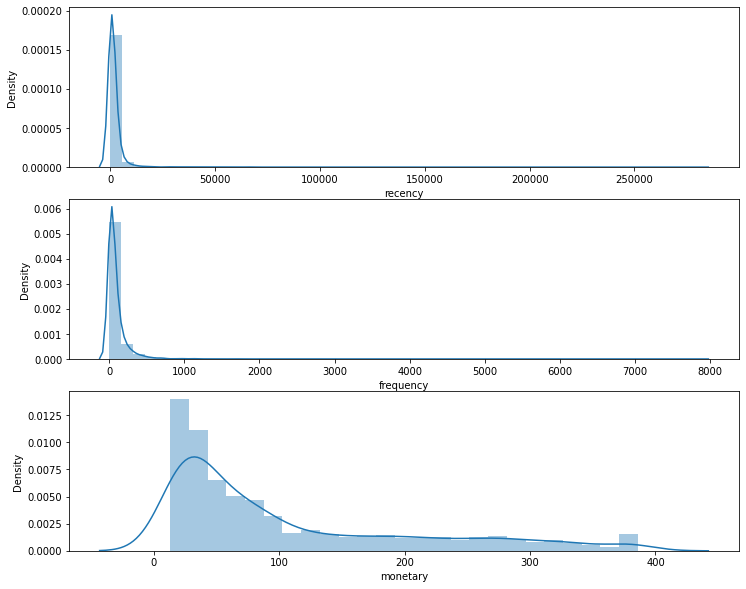

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm['recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm['frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm['monetary'])
# Show the plot
plt.show()

In [ ]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Score')['RFM_Score'].nunique()
print(rfm_count_unique.sum())
rfm.dtypes

120


monetary         int64
frequency        int64
recency          int64
r_quartile    category
f_quartile    category
m_quartile    category
RFM_Score       object
dtype: object

#Scaled RFM score

In [ ]:
rfm.r_quartile = rfm.r_quartile.astype(int)
rfm.f_quartile = rfm.f_quartile.astype(int)
rfm.m_quartile = rfm.m_quartile.astype(int)

In [ ]:
rfm['RFM_Score'] = 0.5 * rfm['m_quartile'] + 0.4 * rfm['f_quartile'] + 0.1 * rfm['r_quartile']

rfm

monetary  frequency  recency  r_quartile  f_quartile  m_quartile  \
CustomerID                                                                     
12346.0          338          1    77183           5           5           1   
12347.0           15        182     4310           5           1           5   
12348.0           88         31     1797           4           3           2   
12349.0           31         73     1757           4           2           4   
12350.0          323         17      334           2           4           1   
...              ...        ...      ...         ...         ...         ...   
18280.0          290         10      180           1           5           1   
18281.0          193          7       80           1           5           1   
18282.0           20         12      178           1           5           5   
18283.0           16        756     2094           5           1           5   
18287.0           55         70     1837           4           2           3   

            RFM_Score  
CustomerID             
12346.0           3.0  
12347.0           3.4  
12348.0           2.6  
12349.0           3.2  
12350.0           2.3  
...               ...  
18280.0           2.6  
18281.0           2.6  
18282.0           4.6  
18283.0           3.4  
18287.0           2.7  

[4339 rows x 7 columns]

In [ ]:
rfm.describe()

monetary    frequency        recency   r_quartile   f_quartile  \
count  4339.000000  4339.000000    4339.000000  4339.000000  4339.000000   
mean    105.041484    91.708689    2053.307905     2.999539     3.021434   
std     100.007757   228.792852    8988.247311     1.415028     1.429696   
min      13.000000     1.000000       0.000000     1.000000     1.000000   
25%      30.000000    17.000000     307.000000     2.000000     2.000000   
50%      63.000000    41.000000     674.000000     3.000000     3.000000   
75%     154.500000   100.000000    1661.000000     4.000000     4.000000   
max     386.000000  7847.000000  280206.000000     5.000000     5.000000   

        m_quartile    RFM_Score  
count  4339.000000  4339.000000  
mean      3.006684     3.011869  
std       1.413138     0.651848  
min       1.000000     1.100000  
25%       2.000000     2.600000  
50%       3.000000     3.000000  
75%       4.000000     3.400000  
max       5.000000     5.000000

# EDA (Exploratory Data Anaysis part)

## Preliminary Glimpse

In [ ]:
# Most of the orders (89%)were made from UK as this company is UK-based and have customers from UK.
t1=cleanedf["Country"].value_counts(sort=True).rename("Country #")
t2=cleanedf["Country"].value_counts(normalize=True,sort=True).rename("Country %")
tx= pd.concat([t1, t2], axis = 1)

print(tx)

                      Country #  Country %
United Kingdom           354345   0.890484
Germany                    9042   0.022723
France                     8342   0.020964
EIRE                       7238   0.018189
Spain                      2485   0.006245
Netherlands                2363   0.005938
Belgium                    2031   0.005104
Switzerland                1842   0.004629
Portugal                   1462   0.003674
Australia                  1185   0.002978
Norway                     1072   0.002694
Italy                       758   0.001905
Channel Islands             748   0.001880
Finland                     685   0.001721
Cyprus                      614   0.001543
Sweden                      451   0.001133
Austria                     398   0.001000
Denmark                     380   0.000955
Poland                      330   0.000829
Japan                       321   0.000807
Israel                      248   0.000623
Unspecified                 244   0.000613
Singapore  

In [17]:
cleanedf.describe()

Quantity      UnitPrice     CustomerID   Invoice_Year  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean       13.021823       3.116174   15294.315171    2010.934259   
std       180.420210      22.096788    1713.169877       0.247829   
min         1.000000       0.000000   12346.000000    2010.000000   
25%         2.000000       1.250000   13969.000000    2011.000000   
50%         6.000000       1.950000   15159.000000    2011.000000   
75%        12.000000       3.750000   16795.000000    2011.000000   
max     80995.000000    8142.750000   18287.000000    2011.000000   

       Invoice_Month    Invoice_Day  Invoice_WeekDay          spend  
count  397924.000000  397924.000000    397924.000000  397924.000000  
mean        7.612537      15.042181         2.614555      22.394749  
std         3.416527       8.653771         1.928274     309.055588  
min         1.000000       1.000000         0.000000       0.000000  
25%         5.000000       7.000000         1.000000       4.680000  
50%         8.000000      15.000000         2.000000      11.800000  
75%        11.000000      22.000000         4.000000      19.800000  
max        12.000000      31.000000         6.000000  168469.600000

In [ ]:
cleanedf.head()

InvoiceNo                          Description  Quantity  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365                  WHITE METAL LANTERN         6   
2    536365       CREAM CUPID HEARTS COAT HANGER         8   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Invoice_Year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom          2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom          2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   

   Invoice_Month  Invoice_Day  Invoice_WeekDay  spend  
0             12            1                2  15.30  
1             12            1                2  20.34  
2             12            1                2  22.00  
3             12            1                2  20.34  
4             12            1                2  20.34

In [ ]:
cleanedf.Quantity.describe() # aproximately 400k entries

cleanedf["spend"].describe()

count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: spend, dtype: float64

In [ ]:
# After cleaning process, it seems that now dataset consists of 4339 unique customers and aprrox. 20k transactions.
pd.DataFrame([{ 'transactions': len(cleanedf['InvoiceNo'].value_counts()),
               'customers': len(cleanedf['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

products  transactions  customers
quantity       NaN         18536       4339

In [20]:
# There are some serious outliers in quantity variable that forces snshistplot to give only one bin. To fix it, I remove outliers in price, spend and quantity columns only for visualizing task

noutlier= cleanedf[["Quantity", "UnitPrice", "spend", "Invoice_Month"]].copy()

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

noutlier = remove_outlier(noutlier, "Quantity")
noutlier = remove_outlier(noutlier, "UnitPrice")
noutlier = remove_outlier(noutlier, "spend")
noutlier = remove_outlier(noutlier, "Invoice_Month")
noutlier

Quantity  UnitPrice  spend  Invoice_Month
0              6       2.55  15.30             12
1              6       3.39  20.34             12
2              8       2.75  22.00             12
3              6       3.39  20.34             12
4              6       3.39  20.34             12
...          ...        ...    ...            ...
541904        12       0.85  10.20             12
541905         6       2.10  12.60             12
541906         4       4.15  16.60             12
541907         4       4.15  16.60             12
541908         3       4.95  14.85             12

[324258 rows x 4 columns]

## Except for the invoice month feature, all other variables' distribution seem skewed to right. One important insight is that the number of transactions is quite high in december. This needs attention.

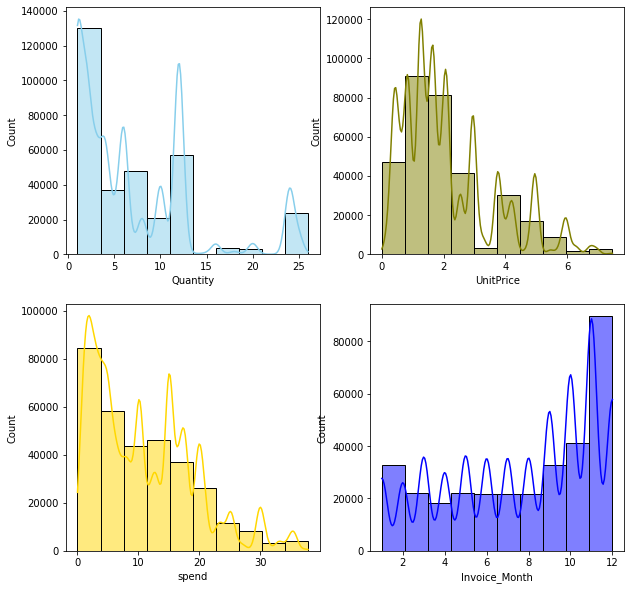

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=noutlier, x="Quantity", bins= 10, kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=noutlier, x="UnitPrice", bins= 10, kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=noutlier, x="spend", bins= 10, kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=noutlier, x="Invoice_Month", bins= 10, kde=True, color="blue", ax=axs[1, 1])
plt.show()

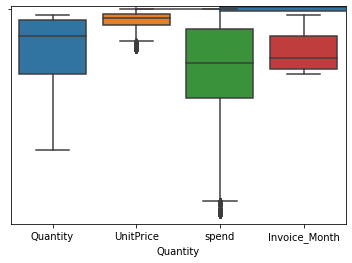

In [ ]:
sns.boxplot( x=noutlier["Quantity"])

sns.boxplot(data=noutlier.loc[:, ['Quantity', 'UnitPrice','spend', 'Invoice_Month']])

In [ ]:
# This correlation plot shows that as quantity increses, spending increases as well. There is a positive relation between the two.
noutlier[['Quantity', 'UnitPrice','spend', 'Invoice_Month']].corr()

Quantity  UnitPrice     spend  Invoice_Month
Quantity       1.000000  -0.427787  0.511594      -0.052280
UnitPrice     -0.427787   1.000000  0.283857      -0.003308
spend          0.511594   0.283857  1.000000      -0.054045
Invoice_Month -0.052280  -0.003308 -0.054045       1.000000

## There is a negative correlation between unitprice of a product and the quantity that it was bought in transactions. One can deduce intuitively that as the unit price increases of a product, the respective quantity that has been sold decreases. This is telling in terms of consumer behaviour as price increases people tend to buy less of a quantity. 

In [ ]:

from scipy import stats
stats.ttest_ind(noutlier['UnitPrice'], noutlier['Quantity'])


Ttest_indResult(statistic=-424.82914420901875, pvalue=0.0)

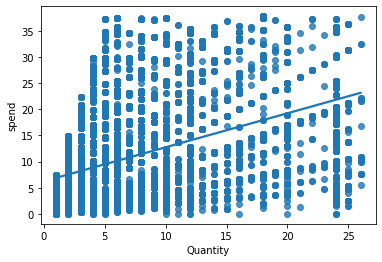

In [ ]:
sns.regplot(x=noutlier["Quantity"], y=noutlier["spend"])

## QQ plot for numeric features

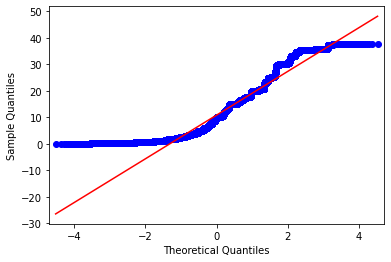

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot                # QQ plot for normality
from matplotlib import pyplot
fig = sm.qqplot(noutlier["spend"],line='s')

pyplot.show()

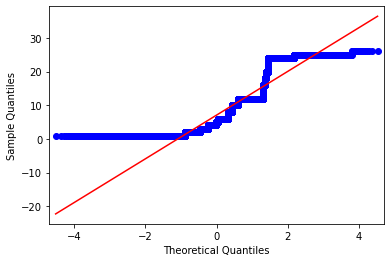

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot                # QQ plot for normality
from matplotlib import pyplot
fig = sm.qqplot(noutlier["Quantity"],line='s')

pyplot.show()

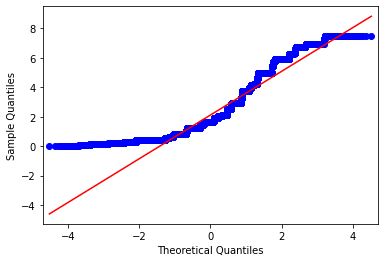

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot                # QQ plot for normality
from matplotlib import pyplot
fig = sm.qqplot(noutlier["UnitPrice"],line='s')

pyplot.show()

In [ ]:
!pip install researchpy
import researchpy as rp
rp.summary_cont(data[['Quantity', 'UnitPrice','spend', 'Invoice_Month']])    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




Variable         N     Mean        SD      SE  95% Conf.  Interval
0       Quantity  406829.0  12.0613  248.6934  0.3899    11.2971   12.8255
1      UnitPrice  406829.0   3.4605   69.3152  0.1087     3.2475    3.6735
2          spend  406829.0  20.4019  427.5917  0.6704    19.0879   21.7158
3  Invoice_Month  406829.0   7.6059    3.4189  0.0054     7.5954    7.6165

## Invoice Month

In [ ]:
print(cleanedf["Invoice_Month"].mode())

0    11
dtype: int64


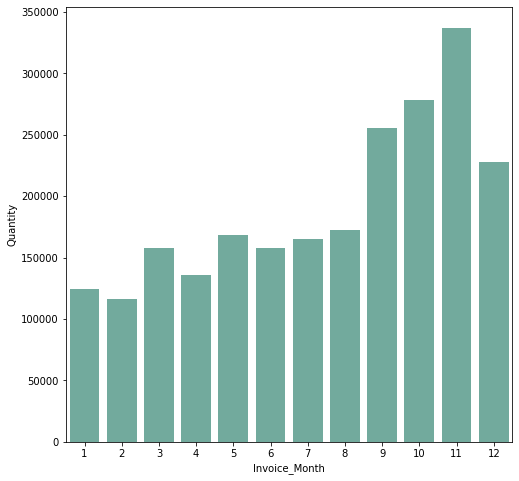

In [ ]:
# Set the figure size
plt.figure(figsize=(8,8))

# plot a bar chart
sns.barplot(
    y="Quantity", 
    x="Invoice_Month", 
    data=noutlier, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

## Wordcloud to understand what people bought mostly in november in which sales boomed. The analysis shows that because probably people do start to prepare for christmas in november, important number of products relating to christmas (such as christmas vintage, tree etc.) were sold.

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [ ]:
# combine all product descriptions into one big text and create a big fat cloud to see which characteristics are most common in these product descriptions
months = cleanedf.groupby('Invoice_Month')['Description'].apply(','.join).reset_index()
months.set_index("Invoice_Month", inplace = True)
months

Description
Invoice_Month                                                   
1              JUMBO BAG PINK POLKADOT,BLUE POLKADOT WRAP,RED...
2              RED SPOT CERAMIC DRAWER KNOB,RED STRIPE CERAMI...
3              DOORMAT UNION JACK GUNS AND ROSES,DOORMAT HEAR...
4              LUNCH BAG DOLLY GIRL DESIGN,HEART IVORY TRELLI...
5              RED TOADSTOOL LED NIGHT LIGHT,ASSORTED COLOUR ...
6              FOOD COVER WITH BEADS SET 2 ,BREAD BIN DINER S...
7              ZINC METAL HEART DECORATION,HANGING JAM JAR T-...
8              6 RIBBONS ELEGANT CHRISTMAS ,SCANDINAVIAN REDS...
9              PINK POLKADOT BOWL,PARTY CONES CANDY ASSORTED,...
10             CHILLI LIGHTS,RED RETROSPOT OVEN GLOVE ,VINTAG...
11             SMALL GLASS HEART TRINKET POT,BAG 250g SWIRLY ...
12             WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL...

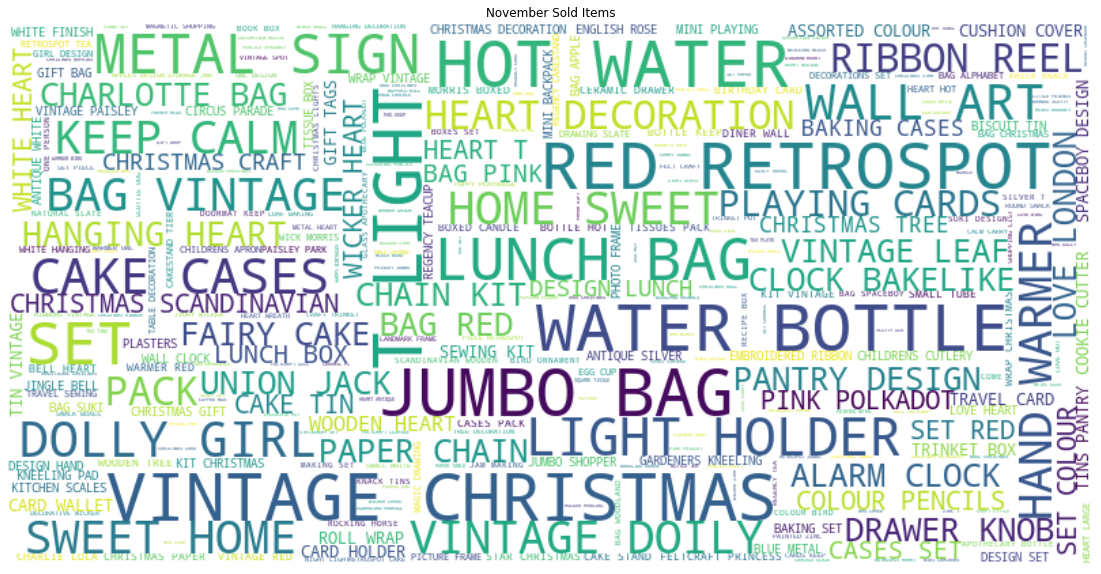

In [ ]:
novem = months.Description[10]

stopwords = set(STOPWORDS)
stopwords.update(["abc"])

# Generating a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=300,stopwords=stopwords, background_color="white",width=800, height=400).generate(novem)

# Displaying the generated image:
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('November Sold Items')
plt.show()

## Wordcloud to understand what people spent more and less than average bought

In [ ]:
customers = cleanedf.groupby('CustomerID')['Description'].apply(','.join).reset_index()
customers.set_index("CustomerID", inplace = True)
customers

Description
CustomerID                                                   
12346.0                        MEDIUM CERAMIC TOP STORAGE JAR
12347.0     BLACK CANDELABRA T-LIGHT HOLDER,AIRLINE BAG VI...
12348.0     72 SWEETHEART FAIRY CAKE CASES,60 CAKE CASES D...
12349.0     PARISIENNE CURIO CABINET,SWEETHEART WALL TIDY ...
12350.0     CHOCOLATE THIS WAY METAL SIGN,METAL SIGN NEIGH...
...                                                       ...
18280.0     WOOD BLACK BOARD ANT WHITE FINISH,RETROSPOT LA...
18281.0     ROBOT BIRTHDAY CARD,CARD CIRCUS PARADE,PENNY F...
18282.0     ANTIQUE CREAM CUTLERY CUPBOARD,FRENCH STYLE ST...
18283.0     CHARLOTTE BAG PINK POLKADOT,LUNCH BAG WOODLAND...
18287.0     SMALL PURPLE BABUSHKA NOTEBOOK ,SMALL RED BABU...

[4339 rows x 1 columns]

In [ ]:
customer = cleanedf.groupby('CustomerID')['spend'].agg('mean').reset_index()
customer.set_index("CustomerID", inplace = True)
customer

spend
CustomerID              
12346.0     77183.600000
12347.0        23.681319
12348.0        57.975484
12349.0        24.076027
12350.0        19.670588
...                  ...
18280.0        18.060000
18281.0        11.545714
18282.0        14.837500
18283.0         2.771005
18287.0        26.246857

[4339 rows x 1 columns]

In [ ]:
merged = customers.merge(customer, on='CustomerID')
merged

Description         spend
CustomerID                                                                 
12346.0                        MEDIUM CERAMIC TOP STORAGE JAR  77183.600000
12347.0     BLACK CANDELABRA T-LIGHT HOLDER,AIRLINE BAG VI...     23.681319
12348.0     72 SWEETHEART FAIRY CAKE CASES,60 CAKE CASES D...     57.975484
12349.0     PARISIENNE CURIO CABINET,SWEETHEART WALL TIDY ...     24.076027
12350.0     CHOCOLATE THIS WAY METAL SIGN,METAL SIGN NEIGH...     19.670588
...                                                       ...           ...
18280.0     WOOD BLACK BOARD ANT WHITE FINISH,RETROSPOT LA...     18.060000
18281.0     ROBOT BIRTHDAY CARD,CARD CIRCUS PARADE,PENNY F...     11.545714
18282.0     ANTIQUE CREAM CUTLERY CUPBOARD,FRENCH STYLE ST...     14.837500
18283.0     CHARLOTTE BAG PINK POLKADOT,LUNCH BAG WOODLAND...      2.771005
18287.0     SMALL PURPLE BABUSHKA NOTEBOOK ,SMALL RED BABU...     26.246857

[4339 rows x 2 columns]

In [ ]:
merged.describe() # mean spend is 68. I will take those spending more than average
mergedf = merged.query('spend > 68') # 318 customers left as the most spenders
mergedf

Description         spend
CustomerID                                                                 
12346.0                        MEDIUM CERAMIC TOP STORAGE JAR  77183.600000
12403.0     CHILDRENS CUTLERY POLKADOT PINK,CHILDRENS CUTL...     85.540000
12409.0     COLOUR GLASS T-LIGHT HOLDER HANGING,WHITE META...    101.584128
12415.0     RIBBON REEL LACE DESIGN ,RIBBON REEL HEARTS DE...    174.461634
12435.0      SPACEBOY BABY GIFT SET,CIRCUS PARADE BABY GIF...    217.496944
...                                                       ...           ...
18220.0     STRAWBERRY CERAMIC TRINKET BOX,SWEETHEART CERA...    152.640000
18233.0                         CHEST NATURAL WOOD 20 DRAWERS    440.000000
18240.0     EDWARDIAN PARASOL BLACK,EDWARDIAN PARASOL NATU...     70.430000
18246.0     WHITE METAL LANTERN,PAPER BUNTING WHITE LACE,P...    149.025000
18251.0     PACK OF 60 DINOSAUR CAKE CASES,PACK OF 72 SKUL...    269.670000

[315 rows x 2 columns]

In [ ]:
liste = mergedf['Description'].tolist()
text = ''.join(liste)
text

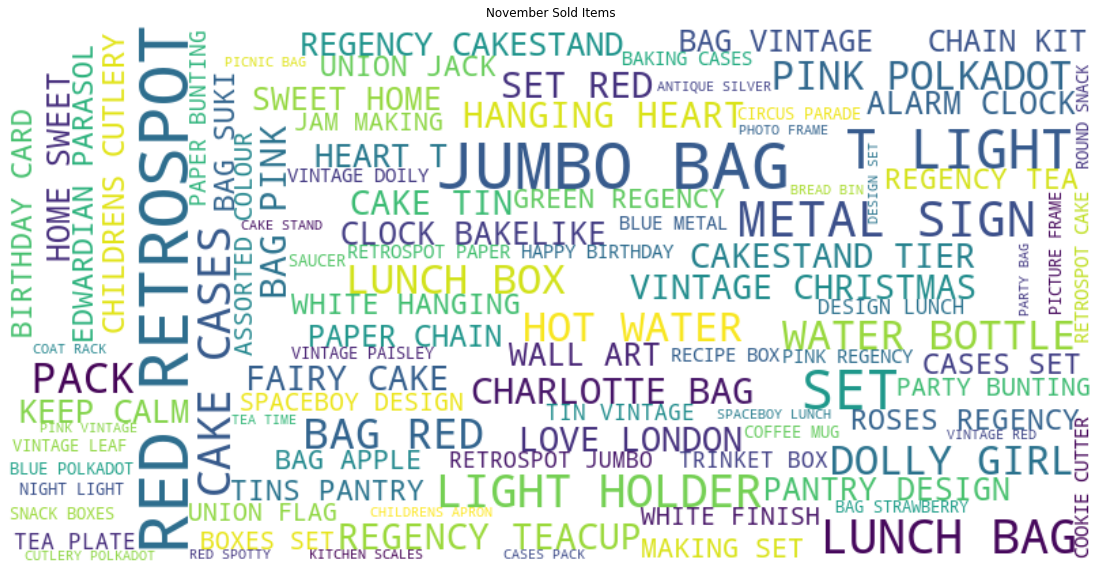

In [ ]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords=stopwords, background_color="white",width=800, height=400).generate(text)

# Displaying the generated image:
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('November Sold Items')
plt.show()

In [ ]:
cleanedf.describe() # heatmap!!!!

Quantity      UnitPrice     CustomerID   Invoice_Year  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean       13.021823       3.116174   15294.315171    2010.934259   
std       180.420210      22.096788    1713.169877       0.247829   
min         1.000000       0.000000   12346.000000    2010.000000   
25%         2.000000       1.250000   13969.000000    2011.000000   
50%         6.000000       1.950000   15159.000000    2011.000000   
75%        12.000000       3.750000   16795.000000    2011.000000   
max     80995.000000    8142.750000   18287.000000    2011.000000   

       Invoice_Month    Invoice_Day  Invoice_WeekDay          spend  
count  397924.000000  397924.000000    397924.000000  397924.000000  
mean        7.612537      15.042181         2.614555      22.394749  
std         3.416527       8.653771         1.928274     309.055588  
min         1.000000       1.000000         0.000000       0.000000  
25%         5.000000       7.000000         1.000000       4.680000  
50%         8.000000      15.000000         2.000000      11.800000  
75%        11.000000      22.000000         4.000000      19.800000  
max        12.000000      31.000000         6.000000  168469.600000

In [ ]:
df = merged.query('spend < 68') # 4023 customers left as the least spenders
df #4023 customers as spenders less than average

Description      spend
CustomerID                                                              
12347.0     BLACK CANDELABRA T-LIGHT HOLDER,AIRLINE BAG VI...  23.681319
12348.0     72 SWEETHEART FAIRY CAKE CASES,60 CAKE CASES D...  57.975484
12349.0     PARISIENNE CURIO CABINET,SWEETHEART WALL TIDY ...  24.076027
12350.0     CHOCOLATE THIS WAY METAL SIGN,METAL SIGN NEIGH...  19.670588
12352.0     WOODEN HAPPY BIRTHDAY GARLAND,PINK DOUGHNUT TR...  29.482824
...                                                       ...        ...
18280.0     WOOD BLACK BOARD ANT WHITE FINISH,RETROSPOT LA...  18.060000
18281.0     ROBOT BIRTHDAY CARD,CARD CIRCUS PARADE,PENNY F...  11.545714
18282.0     ANTIQUE CREAM CUTLERY CUPBOARD,FRENCH STYLE ST...  14.837500
18283.0     CHARLOTTE BAG PINK POLKADOT,LUNCH BAG WOODLAND...   2.771005
18287.0     SMALL PURPLE BABUSHKA NOTEBOOK ,SMALL RED BABU...  26.246857

[4023 rows x 2 columns]

In [ ]:
liste_v2 = df['Description'].tolist()
text_v2 = ''.join(liste_v2)

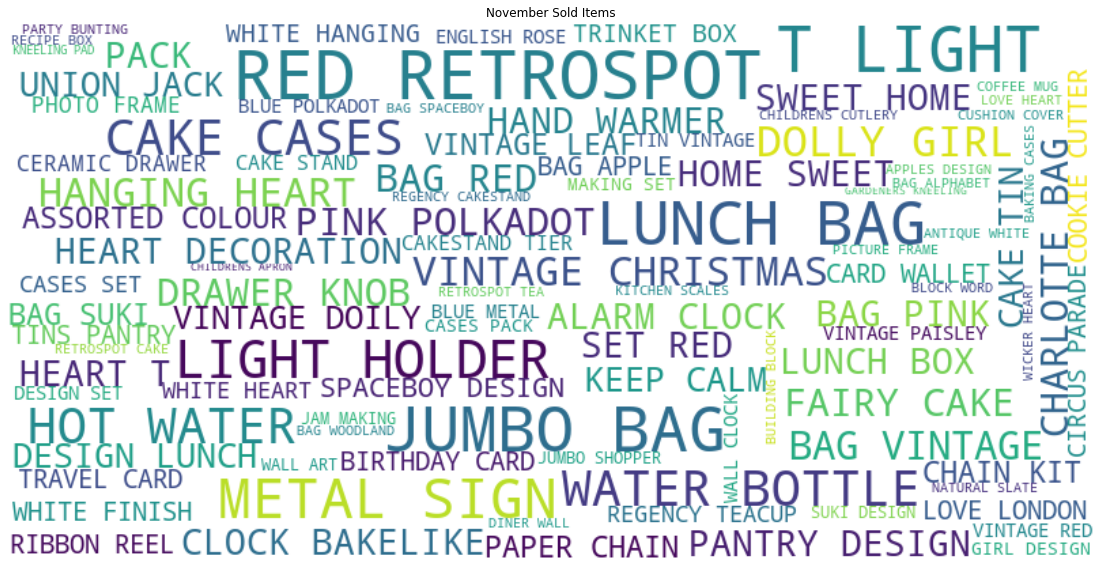

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["anthropology", "anthropological", "cultural", "studies"])

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords=stopwords, background_color="white",width=800, height=400).generate(text_v2)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('November Sold Items')
plt.show()

In [ ]:
cleanedf.head()

InvoiceNo                          Description  Quantity  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365                  WHITE METAL LANTERN         6   
2    536365       CREAM CUPID HEARTS COAT HANGER         8   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Invoice_Year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom          2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom          2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010   

   Invoice_Month  Invoice_Day  Invoice_WeekDay  spend  
0             12            1                2  15.30  
1             12            1                2  20.34  
2             12            1                2  22.00  
3             12            1                2  20.34  
4             12            1                2  20.34

In [ ]:
# It takes a LOT of time!
# heat = cleanedf[['Quantity', 'UnitPrice', 'Invoice_Month', 'Invoice_Day', 'Invoice_WeekDay', 'spend']].copy()
# sns.heatmap(heat, annot=True, annot_kws={"size": 7})

## Which countries buy what? Is there a pattern?

In [ ]:
# Groupby by country
country = cleanedf.groupby("Country")

# Summary statistic of all countries
country.describe().head()

Quantity                                                        \
             count       mean        std  min   25%   50%    75%     max   
Country                                                                    
Australia   1185.0  71.062447  98.736107  1.0  10.0  32.0  100.0  1152.0   
Austria      398.0  12.263819  21.590493  1.0   6.0  10.0   12.0   288.0   
Bahrain       17.0  15.294118  24.959379  2.0   6.0   6.0    8.0    96.0   
Belgium     2031.0  11.441162  13.597680  1.0   4.0  10.0   12.0   272.0   
Brazil        32.0  11.125000   8.476723  2.0   3.0  10.0   18.0    24.0   

          UnitPrice            ... Invoice_WeekDay        spend              \
              count      mean  ...             75%  max   count        mean   
Country                        ...                                            
Australia    1185.0  3.048523  ...             3.0  6.0  1185.0  116.895620   
Austria       398.0  4.256030  ...             3.0  6.0   398.0   25.624824   
Bahrain        17.0  4.644118  ...             0.0  3.0    17.0   32.258824   
Belgium      2031.0  3.630158  ...             4.0  6.0  2031.0   20.283772   
Brazil         32.0  4.456250  ...             4.0  4.0    32.0   35.737500   

                                                            
                  std    min   25%    50%      75%     max  
Country                                                     
Australia  159.802296   0.00  17.7  66.00  152.640  1718.4  
Austria     34.525167   2.88  13.5  17.17   22.500   360.0  
Bahrain     26.878478  11.60  17.7  25.50   30.000   120.0  
Belgium     15.248268   2.50  13.2  16.60   20.800   165.0  
Brazil      32.896282  15.00  16.5  19.65   47.475   175.2  

[5 rows x 64 columns]

In [ ]:
countries = cleanedf.groupby('Country')['Description'].apply(','.join).reset_index()
countries.set_index("Country", inplace = True)
countries

Description
Country                                                                
Australia             CHRISTMAS LIGHTS 10 REINDEER,VINTAGE UNION JAC...
Austria               CERAMIC CAKE STAND + HANGING CAKES,MINI CAKE S...
Bahrain               GROW A FLYTRAP OR SUNFLOWER IN TIN,ICE CREAM S...
Belgium               SET OF 20 KIDS COOKIE CUTTERS,RED RETROSPOT RO...
Brazil                REGENCY CAKESTAND 3 TIER,ROSES REGENCY TEACUP ...
Canada                BOX OF 9 PEBBLE CANDLES,TUMBLER, BAROQUE,SILVE...
Channel Islands       DOORMAT HOME SWEET HOME BLUE ,DOORMAT UNION JA...
Cyprus                WHITE HANGING HEART T-LIGHT HOLDER,SPACE CADET...
Czech Republic        BAKING MOULD HEART MILK CHOCOLATE,COLOUR GLASS...
Denmark               BREAD BIN DINER STYLE IVORY,WOODEN OWLS LIGHT ...
EIRE                  ROSE COTTAGE KEEPSAKE BOX ,BLUE CHARLIE+LOLA P...
European Community    3 TIER CAKE TIN GREEN AND CREAM,ROUND CAKE TIN...
Finland               72 SWEETHEART FAIRY CAKE CASES,60 CAKE CASES D...
France                ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE...
Germany               SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS...
Greece                ROSES REGENCY TEACUP AND SAUCER ,GREEN REGENCY...
Iceland               BLACK CANDELABRA T-LIGHT HOLDER,AIRLINE BAG VI...
Israel                HOOK, 1 HANGER ,MAGIC GARDEN,3 HOOK HANGER MAG...
Italy                 T-LIGHT GLASS FLUTED ANTIQUE,SCENTED VELVET LO...
Japan                 SET OF 6 VINTAGE NOTELETS KIT,FANCY FONT BIRTH...
Lebanon               LAUNDRY 15C METAL SIGN,BEWARE OF THE CAT METAL...
Lithuania             MONEY BOX BISCUITS DESIGN,RED  HARMONICA IN BO...
Malta                 LANTERN CREAM GAZEBO ,WHITE HANGING HEART T-LI...
Netherlands           HAND WARMER BIRD DESIGN,POSTAGE,PACK OF 12 WOO...
Norway                BOX OF 24 COCKTAIL PARASOLS,GROW YOUR OWN PLAN...
Poland                RED HANGING HEART T-LIGHT HOLDER,STRAWBERRY CE...
Portugal              VINTAGE PAISLEY STATIONERY SET,LUNCH BAG SUKI ...
RSA                   RED RETROSPOT CUP,PINK  POLKADOT PLATE ,SET OF...
Saudi Arabia          ASSORTED BOTTLE TOP  MAGNETS ,GLASS JAR MARMAL...
Singapore             GIN & TONIC DIET GREETING CARD ,GREEN REGENCY ...
Spain                 LUNCH BAG SUKI  DESIGN ,LUNCH BAG PINK POLKADO...
Sweden                SET OF 3 BABUSHKA STACKING TINS,WORLD WAR 2 GL...
Switzerland           ROUND SNACK BOXES SET OF4 WOODLAND ,PLASTERS I...
USA                   SET OF 6 SPICE TINS PANTRY DESIGN,PANTRY WASHI...
United Arab Emirates  RETROSPOT HEART HOT WATER BOTTLE,DOORMAT UNION...
United Kingdom        WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL...
Unspecified           DOORMAT RED RETROSPOT,DOORMAT WELCOME SUNRISE,...

In [ ]:
quantities = cleanedf.groupby('Country')['Quantity'].agg('mean').reset_index()
quantities.set_index("Country", inplace = True)
quantities

Quantity
Country                        
Australia             71.062447
Austria               12.263819
Bahrain               15.294118
Belgium               11.441162
Brazil                11.125000
Canada                18.298013
Channel Islands       12.688503
Cyprus                10.359935
Czech Republic        26.840000
Denmark               21.671053
EIRE                  19.414894
European Community     8.316667
Finland               15.626277
France                13.362743
Germany               13.189892
Greece                10.737931
Iceland               13.505495
Israel                16.314516
Italy                 10.701847
Japan                 81.046729
Lebanon                8.577778
Lithuania             18.628571
Malta                  8.660714
Netherlands           85.034702
Norway                18.039179
Poland                11.163636
Portugal              11.027360
RSA                    6.068966
Saudi Arabia           8.888889
Singapore             23.608108
Spain                 11.247887
Sweden                80.006652
Switzerland           16.331705
USA                   13.731844
United Arab Emirates  14.441176
United Kingdom        12.048913
Unspecified            7.331967

In [ ]:
combined = countries.merge(quantities, on='Country')
combined # What people in Arabian peninsula and USA did buy? Are there any noticable differences?

Description  \
Country                                                                   
Australia             CHRISTMAS LIGHTS 10 REINDEER,VINTAGE UNION JAC...   
Austria               CERAMIC CAKE STAND + HANGING CAKES,MINI CAKE S...   
Bahrain               GROW A FLYTRAP OR SUNFLOWER IN TIN,ICE CREAM S...   
Belgium               SET OF 20 KIDS COOKIE CUTTERS,RED RETROSPOT RO...   
Brazil                REGENCY CAKESTAND 3 TIER,ROSES REGENCY TEACUP ...   
Canada                BOX OF 9 PEBBLE CANDLES,TUMBLER, BAROQUE,SILVE...   
Channel Islands       DOORMAT HOME SWEET HOME BLUE ,DOORMAT UNION JA...   
Cyprus                WHITE HANGING HEART T-LIGHT HOLDER,SPACE CADET...   
Czech Republic        BAKING MOULD HEART MILK CHOCOLATE,COLOUR GLASS...   
Denmark               BREAD BIN DINER STYLE IVORY,WOODEN OWLS LIGHT ...   
EIRE                  ROSE COTTAGE KEEPSAKE BOX ,BLUE CHARLIE+LOLA P...   
European Community    3 TIER CAKE TIN GREEN AND CREAM,ROUND CAKE TIN...   
Finland               72 SWEETHEART FAIRY CAKE CASES,60 CAKE CASES D...   
France                ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE...   
Germany               SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS...   
Greece                ROSES REGENCY TEACUP AND SAUCER ,GREEN REGENCY...   
Iceland               BLACK CANDELABRA T-LIGHT HOLDER,AIRLINE BAG VI...   
Israel                HOOK, 1 HANGER ,MAGIC GARDEN,3 HOOK HANGER MAG...   
Italy                 T-LIGHT GLASS FLUTED ANTIQUE,SCENTED VELVET LO...   
Japan                 SET OF 6 VINTAGE NOTELETS KIT,FANCY FONT BIRTH...   
Lebanon               LAUNDRY 15C METAL SIGN,BEWARE OF THE CAT METAL...   
Lithuania             MONEY BOX BISCUITS DESIGN,RED  HARMONICA IN BO...   
Malta                 LANTERN CREAM GAZEBO ,WHITE HANGING HEART T-LI...   
Netherlands           HAND WARMER BIRD DESIGN,POSTAGE,PACK OF 12 WOO...   
Norway                BOX OF 24 COCKTAIL PARASOLS,GROW YOUR OWN PLAN...   
Poland                RED HANGING HEART T-LIGHT HOLDER,STRAWBERRY CE...   
Portugal              VINTAGE PAISLEY STATIONERY SET,LUNCH BAG SUKI ...   
RSA                   RED RETROSPOT CUP,PINK  POLKADOT PLATE ,SET OF...   
Saudi Arabia          ASSORTED BOTTLE TOP  MAGNETS ,GLASS JAR MARMAL...   
Singapore             GIN & TONIC DIET GREETING CARD ,GREEN REGENCY ...   
Spain                 LUNCH BAG SUKI  DESIGN ,LUNCH BAG PINK POLKADO...   
Sweden                SET OF 3 BABUSHKA STACKING TINS,WORLD WAR 2 GL...   
Switzerland           ROUND SNACK BOXES SET OF4 WOODLAND ,PLASTERS I...   
USA                   SET OF 6 SPICE TINS PANTRY DESIGN,PANTRY WASHI...   
United Arab Emirates  RETROSPOT HEART HOT WATER BOTTLE,DOORMAT UNION...   
United Kingdom        WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL...   
Unspecified           DOORMAT RED RETROSPOT,DOORMAT WELCOME SUNRISE,...   

                       Quantity  
Country                          
Australia             71.062447  
Austria               12.263819  
Bahrain               15.294118  
Belgium               11.441162  
Brazil                11.125000  
Canada                18.298013  
Channel Islands       12.688503  
Cyprus                10.359935  
Czech Republic        26.840000  
Denmark               21.671053  
EIRE                  19.414894  
European Community     8.316667  
Finland               15.626277  
France                13.362743  
Germany               13.189892  
Greece                10.737931  
Iceland               13.505495  
Israel                16.314516  
Italy                 10.701847  
Japan                 81.046729  
Lebanon                8.577778  
Lithuania             18.628571  
Malta                  8.660714  
Netherlands           85.034702  
Norway                18.039179  
Poland                11.163636  
Portugal              11.027360  
RSA                    6.068966  
Saudi Arabia           8.888889  
Singapore             23.608108  
Spain                 11.247887  
Sweden      

In [ ]:
arabs = combined.query("Country == 'United Arab Emirates' | Country == 'Saudi Arabia'")
arabs

Description  \
Country                                                                   
Saudi Arabia          ASSORTED BOTTLE TOP  MAGNETS ,GLASS JAR MARMAL...   
United Arab Emirates  RETROSPOT HEART HOT WATER BOTTLE,DOORMAT UNION...   

                       Quantity  
Country                          
Saudi Arabia           8.888889  
United Arab Emirates  14.441176

In [ ]:
arabtext = arabs['Description'][0] + arabs['Description'][1]
arabtext

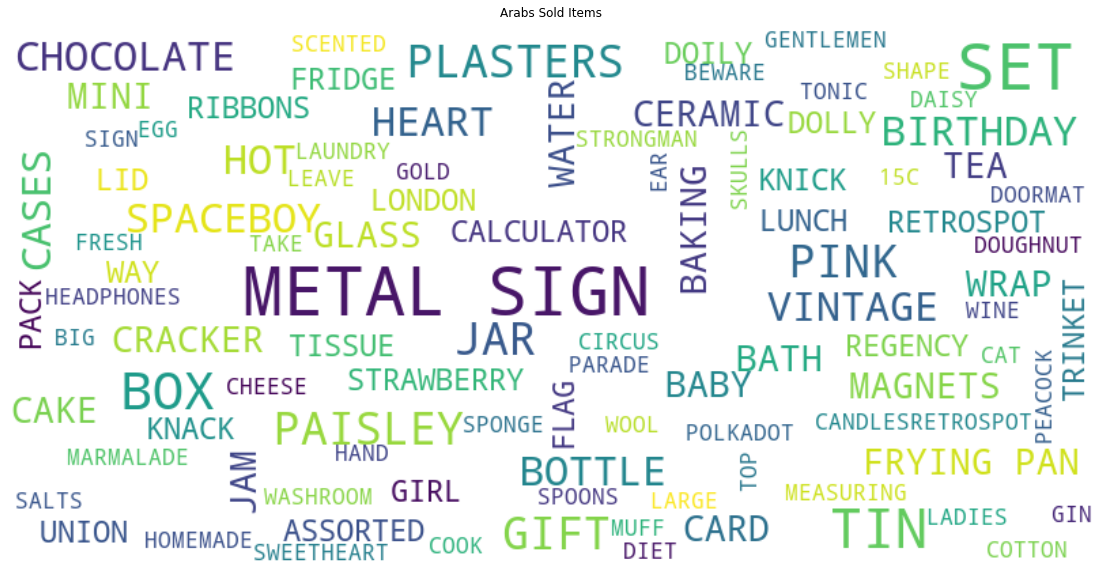

In [ ]:

wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords=stopwords, background_color="white",width=800, height=400).generate(arabtext)

# Displaying the generated image:

plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Arabs Sold Items')
plt.show()

In [ ]:
usatext = combined['Description'][-4]
usatext

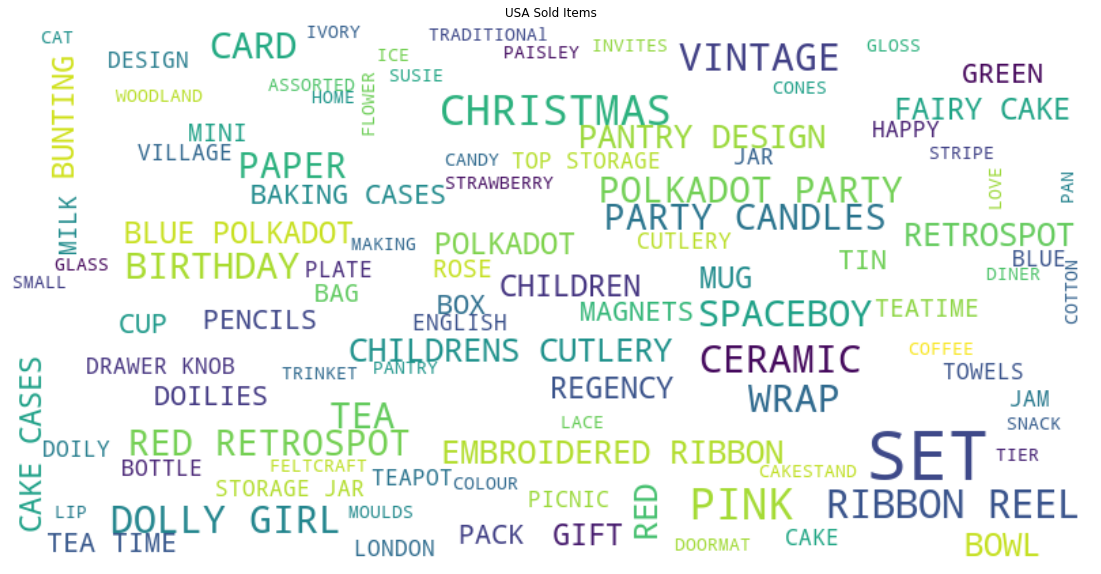

In [ ]:

wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords=stopwords, background_color="white",width=800, height=400).generate(usatext)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('USA Sold Items')
plt.show()

## Time Series

In [ ]:
cleanedf['InvoiceDate'] = pd.to_datetime(cleanedf['InvoiceDate']).dt.date
cleanedf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


InvoiceNo                          Description  Quantity InvoiceDate  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6  2010-12-01   
1    536365                  WHITE METAL LANTERN         6  2010-12-01   
2    536365       CREAM CUPID HEARTS COAT HANGER         8  2010-12-01   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  2010-12-01   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6  2010-12-01   

   UnitPrice  CustomerID         Country  Invoice_Year  Invoice_Month  \
0       2.55     17850.0  United Kingdom          2010             12   
1       3.39     17850.0  United Kingdom          2010             12   
2       2.75     17850.0  United Kingdom          2010             12   
3       3.39     17850.0  United Kingdom          2010             12   
4       3.39     17850.0  United Kingdom          2010             12   

   Invoice_Day  Invoice_WeekDay  spend  
0            1                2  15.30  
1            1                2  20.34  
2            1                2  22.00  
3            1                2  20.34  
4            1                2  20.34

In [ ]:
cleanedf['InvoiceDate'] = pd.to_datetime(cleanedf['InvoiceDate'])
cleanedf.dtypes
cleanedf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


InvoiceNo                          Description  Quantity InvoiceDate  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6  2010-12-01   
1    536365                  WHITE METAL LANTERN         6  2010-12-01   
2    536365       CREAM CUPID HEARTS COAT HANGER         8  2010-12-01   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  2010-12-01   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6  2010-12-01   

   UnitPrice  CustomerID         Country  Invoice_Year  Invoice_Month  \
0       2.55     17850.0  United Kingdom          2010             12   
1       3.39     17850.0  United Kingdom          2010             12   
2       2.75     17850.0  United Kingdom          2010             12   
3       3.39     17850.0  United Kingdom          2010             12   
4       3.39     17850.0  United Kingdom          2010             12   

   Invoice_Day  Invoice_WeekDay  spend  
0            1                2  15.30  
1            1                2  20.34  
2            1                2  22.00  
3            1                2  20.34  
4            1                2  20.34

In [ ]:
timely.drop(['Invoice_Year','Invoice_Month','Invoice_Day','Invoice_WeekDay'], axis=1)

InvoiceNo                          Description  Quantity  \
InvoiceDate                                                            
2010-12-01     536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
2010-12-01     536365                  WHITE METAL LANTERN         6   
2010-12-01     536365       CREAM CUPID HEARTS COAT HANGER         8   
2010-12-01     536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
2010-12-01     536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...               ...                                  ...       ...   
2011-12-09     581587          PACK OF 20 SPACEBOY NAPKINS        12   
2011-12-09     581587         CHILDREN'S APRON DOLLY GIRL          6   
2011-12-09     581587        CHILDRENS CUTLERY DOLLY GIRL          4   
2011-12-09     581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
2011-12-09     581587        BAKING SET 9 PIECE RETROSPOT          3   

             UnitPrice  CustomerID         Country  spend  
InvoiceDate                                                
2010-12-01        2.55     17850.0  United Kingdom  15.30  
2010-12-01        3.39     17850.0  United Kingdom  20.34  
2010-12-01        2.75     17850.0  United Kingdom  22.00  
2010-12-01        3.39     17850.0  United Kingdom  20.34  
2010-12-01        3.39     17850.0  United Kingdom  20.34  
...                ...         ...             ...    ...  
2011-12-09        0.85     12680.0          France  10.20  
2011-12-09        2.10     12680.0          France  12.60  
2011-12-09        4.15     12680.0          France  16.60  
2011-12-09        4.15     12680.0          France  16.60  
2011-12-09        4.95     12680.0          France  14.85  

[397924 rows x 7 columns]

In [ ]:
timely = cleanedf.set_index('InvoiceDate')
timely.head(3)

InvoiceNo                         Description  Quantity  \
InvoiceDate                                                           
2010-12-01     536365  WHITE HANGING HEART T-LIGHT HOLDER         6   
2010-12-01     536365                 WHITE METAL LANTERN         6   
2010-12-01     536365      CREAM CUPID HEARTS COAT HANGER         8   

             UnitPrice  CustomerID         Country  Invoice_Year  \
InvoiceDate                                                        
2010-12-01        2.55     17850.0  United Kingdom          2010   
2010-12-01        3.39     17850.0  United Kingdom          2010   
2010-12-01        2.75     17850.0  United Kingdom          2010   

             Invoice_Month  Invoice_Day  Invoice_WeekDay  spend  
InvoiceDate                                                      
2010-12-01              12            1                2  15.30  
2010-12-01              12            1                2  20.34  
2010-12-01              12            1                2  22.00

In [ ]:
# Adding columns with year, month, and weekday name
timely['Year'] = timely.index.year
timely['Month'] = timely.index.month
timely['Weekday'] = timely.index.day_name()

# Displaying a random sampling of 5 rows
timely.sample(5, random_state=0)

InvoiceNo                         Description  Quantity  \
InvoiceDate                                                           
2011-03-06     545687  SET OF 12 MINI BUNNIES IN A BUCKET         1   
2011-11-14     576212              WRAP CHRISTMAS VILLAGE        25   
2011-07-04     558868                   RED RETROSPOT CUP        32   
2011-08-03     562204         BOX OF 24 COCKTAIL PARASOLS         1   
2011-02-18     544406        MAGIC DRAWING SLATE DINOSAUR         1   

             UnitPrice  CustomerID         Country  Invoice_Year  \
InvoiceDate                                                        
2011-03-06        2.10     17769.0  United Kingdom          2011   
2011-11-14        0.42     18082.0  United Kingdom          2011   
2011-07-04        0.85     13266.0  United Kingdom          2011   
2011-08-03        0.42     16324.0  United Kingdom          2011   
2011-02-18        0.42     16726.0  United Kingdom          2011   

             Invoice_Month  Invoice_Day  Invoice_WeekDay  spend  Year  Month  \
InvoiceDate                                                                    
2011-03-06               3            6                6   2.10  2011      3   
2011-11-14              11           14                0  10.50  2011     11   
2011-07-04               7            4                0  27.20  2011      7   
2011-08-03               8            3                2   0.42  2011      8   
2011-02-18               2           18                4   0.42  2011      2   

               Weekday  
InvoiceDate             
2011-03-06      Sunday  
2011-11-14      Monday  
2011-07-04      Monday  
2011-08-03   Wednesday  
2011-02-18      Friday

In [ ]:
timely.drop(['Invoice_Year','Invoice_Month','Invoice_Day','Invoice_WeekDay'], axis=1)

InvoiceNo                          Description  Quantity  \
InvoiceDate                                                            
2010-12-01     536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
2010-12-01     536365                  WHITE METAL LANTERN         6   
2010-12-01     536365       CREAM CUPID HEARTS COAT HANGER         8   
2010-12-01     536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
2010-12-01     536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...               ...                                  ...       ...   
2011-12-09     581587          PACK OF 20 SPACEBOY NAPKINS        12   
2011-12-09     581587         CHILDREN'S APRON DOLLY GIRL          6   
2011-12-09     581587        CHILDRENS CUTLERY DOLLY GIRL          4   
2011-12-09     581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
2011-12-09     581587        BAKING SET 9 PIECE RETROSPOT          3   

             UnitPrice  CustomerID         Country  spend  Year  Month  \
InvoiceDate                                                              
2010-12-01        2.55     17850.0  United Kingdom  15.30  2010     12   
2010-12-01        3.39     17850.0  United Kingdom  20.34  2010     12   
2010-12-01        2.75     17850.0  United Kingdom  22.00  2010     12   
2010-12-01        3.39     17850.0  United Kingdom  20.34  2010     12   
2010-12-01        3.39     17850.0  United Kingdom  20.34  2010     12   
...                ...         ...             ...    ...   ...    ...   
2011-12-09        0.85     12680.0          France  10.20  2011     12   
2011-12-09        2.10     12680.0          France  12.60  2011     12   
2011-12-09        4.15     12680.0          France  16.60  2011     12   
2011-12-09        4.15     12680.0          France  16.60  2011     12   
2011-12-09        4.95     12680.0          France  14.85  2011     12   

               Weekday  
InvoiceDate             
2010-12-01   Wednesday  
2010-12-01   Wednesday  
2010-12-01   Wednesday  
2010-12-01   Wednesday  
2010-12-01   Wednesday  
...                ...  
2011-12-09      Friday  
2011-12-09      Friday  
2011-12-09      Friday  
2011-12-09      Friday  
2011-12-09      Friday  

[397924 rows x 10 columns]

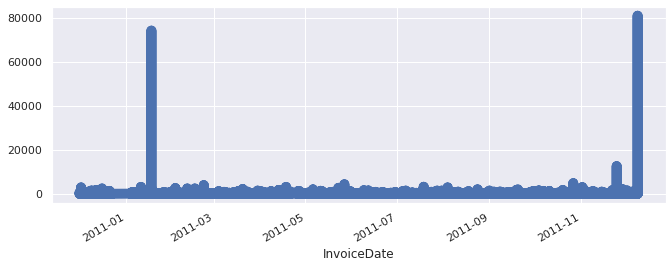

In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})
timely['Quantity'].plot(linewidth=10);

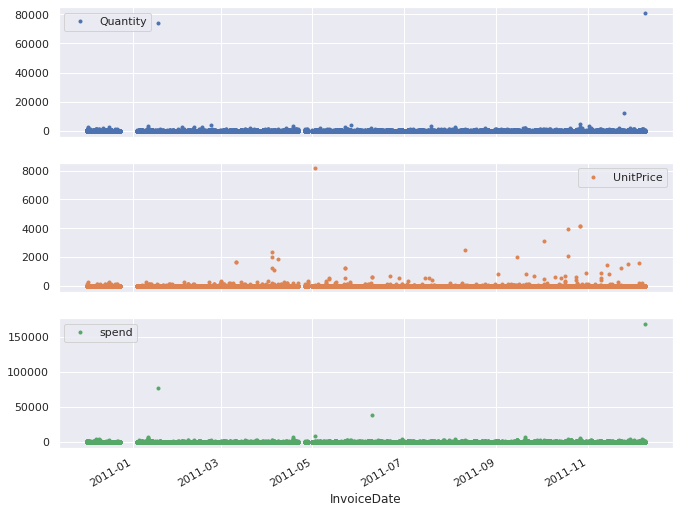

In [ ]:
myplot = ['Quantity', 'UnitPrice', 'spend']
axes = timely[myplot].plot(marker='.', alpha=1, linestyle='None', figsize=(11, 9), subplots=True)


In [ ]:
timely = remove_outlier(timely, "Quantity")
timely = remove_outlier(timely, "UnitPrice")
timely = remove_outlier(timely, "spend")

In [ ]:
timely['logarithm_quantity'] = np.log(data['Quantity'])
timely['logarithm_unitprice'] = np.log(timely['UnitPrice'])
timely['logarithm_spend'] = np.log(timely['spend'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


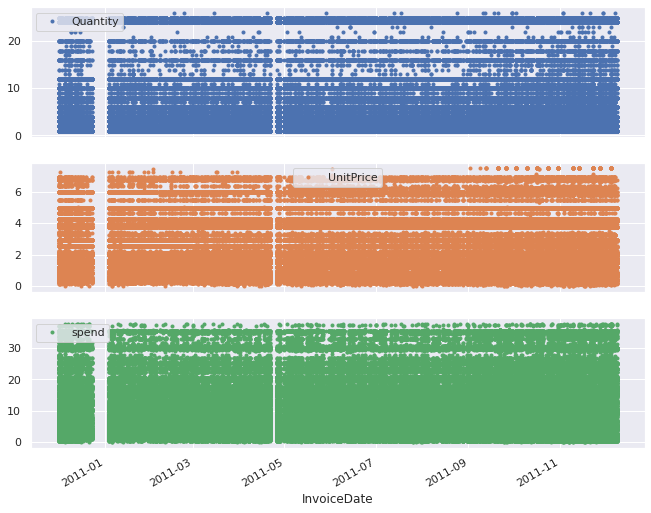

In [ ]:
myplot = ['Quantity', 'UnitPrice', 'spend']
axes = timely[myplot].plot(marker='.', alpha=1, linestyle='None', figsize=(11, 9), subplots=True)

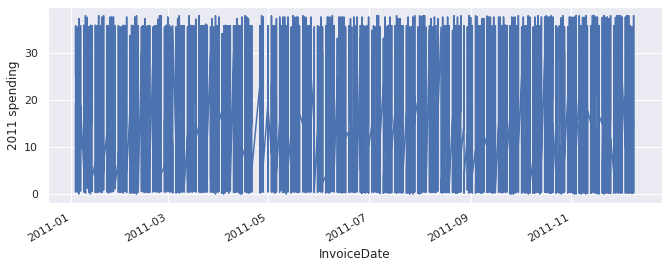

In [ ]:
ax = timely.loc['2011', 'spend'].plot()
ax.set_ylabel('2011 spending');

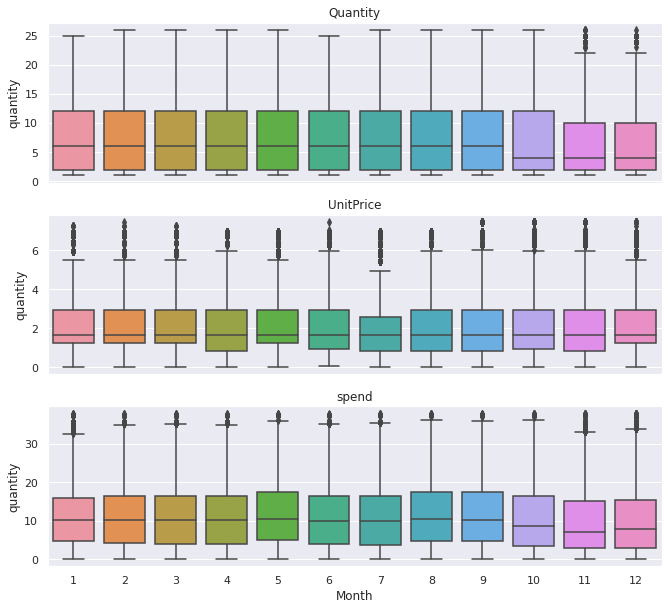

In [ ]:
# We do not see any seosanality effect
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Quantity', 'UnitPrice', 'spend'], axes):
  sns.boxplot(data=timely, x='Month', y=name, ax=ax)
  ax.set_ylabel('quantity')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
  if ax != axes[-1]:
      ax.set_xlabel('')

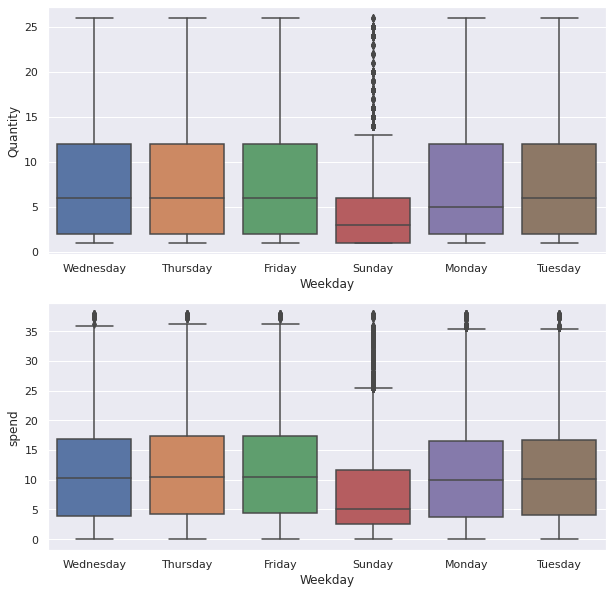

In [ ]:
## Interestingly the quantity being sold and spending in transactions dramatically drops in sundays though outliers
f, axes = plt.subplots(2, figsize = (10,10))
sns.boxplot(x='Weekday', y='Quantity',  data=timely, ax=axes[0])
sns.boxplot(x='Weekday', y='spend',  data=timely, ax=axes[1])

## Time Series Monthly Analysis

In [ ]:
monthly=timely.resample("M").Quantity.agg(["mean"])

In [ ]:
monthly

mean
InvoiceDate          
2010-12-31   6.269317
2011-01-31   7.319494
2011-02-28   7.303724
2011-03-31   7.178020
2011-04-30   7.388501
2011-05-31   7.550758
2011-06-30   7.286898
2011-07-31   7.628731
2011-08-31   7.927201
2011-09-30   7.814361
2011-10-31   6.752310
2011-11-30   6.201663
2011-12-31   6.643846

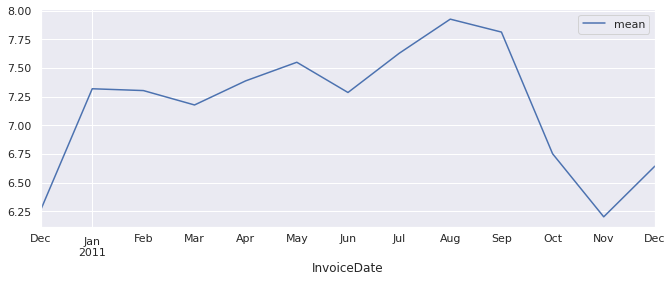

In [ ]:
# even though most of the transactions occured in november, the quantity being sold in this mounth is the least. That is interesting. In august of 2011, quantites being sold boomed
monthly.plot()

## Parts of the Day Analysis: Analysis shows that 63% of transactions occurred during mornings. It is interesting to see that people bought mostly between 8 and 12 AM.

In [ ]:
# cleaning cancelled transactions
import re

pattern = "C\d+"

clean = data[data['InvoiceNo'].str.contains(pattern, na=False)==False]
noutlier = remove_outlier(clean, "Quantity")
noutlier = remove_outlier(clean, "UnitPrice")
noutlier = remove_outlier(clean, "spend")

clean

InvoiceNo                          Description  Quantity  \
0         536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365                  WHITE METAL LANTERN         6   
2         536365       CREAM CUPID HEARTS COAT HANGER         8   
3         536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...                                  ...       ...   
541904    581587          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

        Invoice_Year  Invoice_Month  Invoice_Day  Invoice_WeekDay  spend  
0               2010             12            1                2  15.30  
1               2010             12            1                2  20.34  
2               2010             12            1                2  22.00  
3               2010             12            1                2  20.34  
4               2010             12            1                2  20.34  
...              ...            ...          ...              ...    ...  
541904          2011             12            9                4  10.20  
541905          2011             12            9                4  12.60  
541906          2011             12            9                4  16.60  
541907          2011             12            9                4  16.60  
541908          2011             12            9                4  14.85  

[397924 rows x 12 columns]

In [ ]:
clean['datehour'] = clean['InvoiceDate'].dt.hour
clean.head()
clean['datehour'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [ ]:
#define function for classifying parts of days
def f(row):
    if 5 <= row['datehour'] <= 7:
        val = 'night'
    elif 8 <= row['datehour'] <= 13:
        val = 'morning'
    elif 14 <= row['datehour'] <= 17:
        val = 'afternoon'
    elif 18 <= row['datehour'] <= 22:
        val = 'evening'
    else:
        val = 'notime'
    return val

clean['time'] = clean.apply(f, axis=1)


clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


InvoiceNo                          Description  Quantity  \
0         536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365                  WHITE METAL LANTERN         6   
2         536365       CREAM CUPID HEARTS COAT HANGER         8   
3         536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...                                  ...       ...   
541904    581587          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

        Invoice_Year  Invoice_Month  Invoice_Day  Invoice_WeekDay  spend  \
0               2010             12            1                2  15.30   
1               2010             12            1                2  20.34   
2               2010             12            1                2  22.00   
3               2010             12            1                2  20.34   
4               2010             12            1                2  20.34   
...              ...            ...          ...              ...    ...   
541904          2011             12            9                4  10.20   
541905          2011             12            9                4  12.60   
541906          2011             12            9                4  16.60   
541907          2011             12            9                4  16.60   
541908          2011             12            9                4  14.85   

        datehour     time  
0              8  morning  
1              8  morning  
2              8  morning  
3              8  morning  
4              8  morning  
...          ...      ...  
541904        12  morning  
541905        12  morning  
541906        12  morning  
541907        12  morning  
541908        12  morning  

[397924 rows x 14 columns]

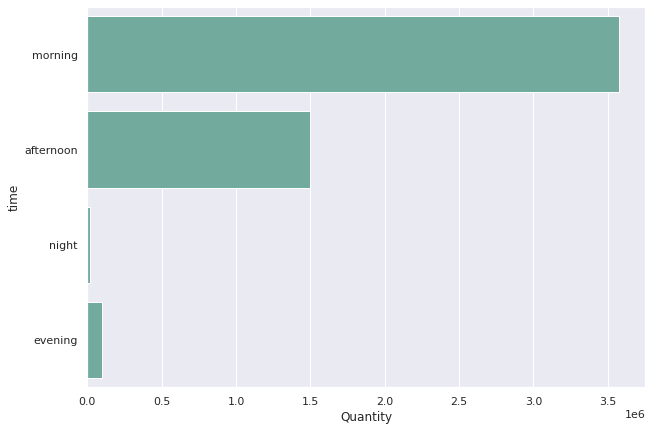

In [ ]:

plt.figure(figsize=(10, 7))


sns.barplot(
    x="Quantity", 
    y="time", 
    data=clean, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

In [ ]:
t1=clean["time"].value_counts(sort=True).rename("time #")
t2=clean["time"].value_counts(normalize=True,sort=True).rename("time %")
tx= pd.concat([t1, t2], axis = 1)

print(tx)

           time #    time %
morning    253827  0.637878
afternoon  136664  0.343442
evening      7053  0.017724
night         380  0.000955


# Clustering Based on RFM

## Outliers and Feature Scaling (automated). Via StandardScaler of sklearn, I standardized recency monetary and frequency features. Thus, dataframe named rfm_df_scaled includes these three features for each unique costumers.

In [29]:
rfmv2 = rfm.drop(['r_quartile', 'f_quartile', 'm_quartile'], axis=1)
rfmv2

monetary  frequency  recency
CustomerID                              
12346.0          338          1    77183
12347.0           15        182     4310
12348.0           88         31     1797
12349.0           31         73     1757
12350.0          323         17      334
...              ...        ...      ...
18280.0          290         10      180
18281.0          193          7       80
18282.0           20         12      178
18283.0           16        756     2094
18287.0           55         70     1837

[4339 rows x 3 columns]

Text(0.5, 0, 'Attributes')

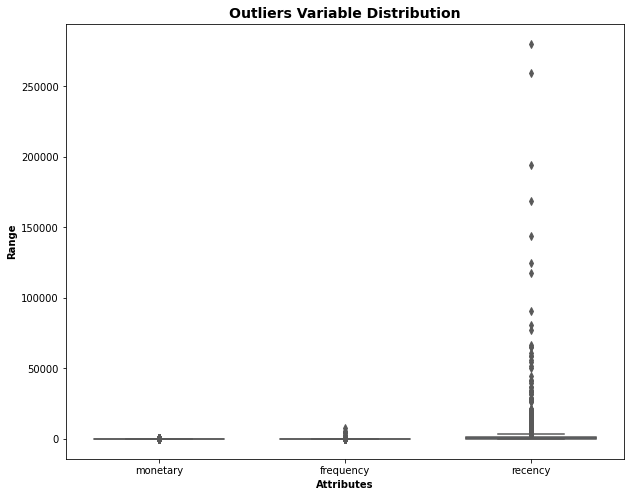

In [30]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['monetary','frequency','recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfmv2[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [31]:
# Outliers are problematic in visualization process as well as in clustering as they distort distributions
# Removing (statistical) outliers for recency
Q1 = rfmv2.recency.quantile(0.05)
Q3 = rfmv2.recency.quantile(0.95)
IQR = Q3 - Q1
rfmv2 = rfmv2[(rfmv2.recency >= Q1 - 1.5*IQR) & (rfmv2.recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for frequency
Q1 = rfmv2.frequency.quantile(0.05)
Q3 = rfmv2.frequency.quantile(0.95)
IQR = Q3 - Q1
rfmv2 = rfmv2[(rfmv2.frequency >= Q1 - 1.5*IQR) & (rfm.frequency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for monetary
Q1 = rfmv2.monetary.quantile(0.05)
Q3 = rfmv2.monetary.quantile(0.95)
IQR = Q3 - Q1
rfmv2 = rfmv2[(rfmv2.monetary >= Q1 - 1.5*IQR) & (rfmv2.monetary <= Q3 + 1.5*IQR)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [33]:
from sklearn.preprocessing import StandardScaler
# Instantiate
scaler = StandardScaler()

# fit_transform
rfmv2 = scaler.fit_transform(rfmv2)
rfmv2.shape

(4257, 3)

In [99]:
rfm_df_scaled = pd.DataFrame(rfmv2)
rfm_df_scaled.columns = ['monetary', 'frequency', 'recency']
rfm_df_scaled.head()

monetary  frequency   recency
0 -0.913148   1.067832  1.646007
1 -0.184527  -0.460601  0.262261
2 -0.753450  -0.035474  0.240235
3  2.161033  -0.602310 -0.543318
4 -0.573790   0.085991  0.652661

## Visualazing RFM features

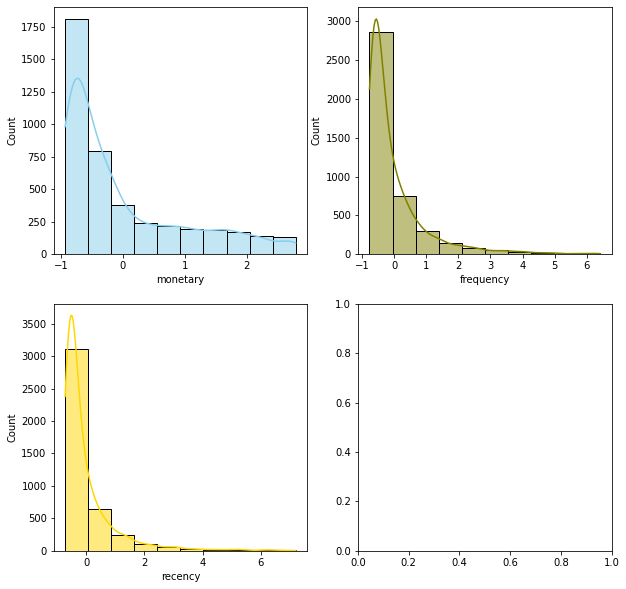

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=rfm_df_scaled, x="monetary", bins= 10, kde=True, color="skyblue", ax=axs[0, 0]) # data was rfmv1
sns.histplot(data=rfm_df_scaled, x="frequency", bins= 10, kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=rfm_df_scaled, x="recency", bins= 10, kde=True, color="gold", ax=axs[1, 0])
plt.show()

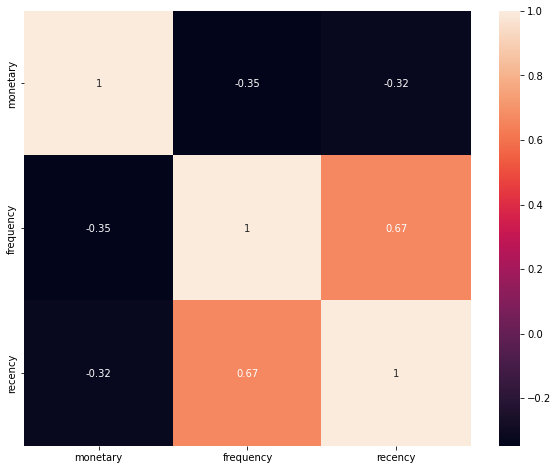

In [36]:
sns.heatmap(rfm_df_scaled.iloc[:, 0:3].corr(), annot=True)

## Agglomerative clustering

In [37]:
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [163]:
knndf = rfm_df_scaled.drop("Cluster_Id", axis = 1).copy()
knndf

monetary  frequency   recency
0    -0.913148   1.067832  1.646007
1    -0.184527  -0.460601  0.262261
2    -0.753450  -0.035474  0.240235
3     2.161033  -0.602310 -0.543318
4    -0.573790   0.085991  0.652661
...        ...        ...       ...
4252 -0.204490  -0.683286 -0.631970
4253  1.831656  -0.673164 -0.628116
4254  0.863489  -0.703530 -0.683179
4255 -0.863243  -0.652920 -0.629217
4256 -0.513904  -0.065840  0.284286

[4257 rows x 3 columns]

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.7/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


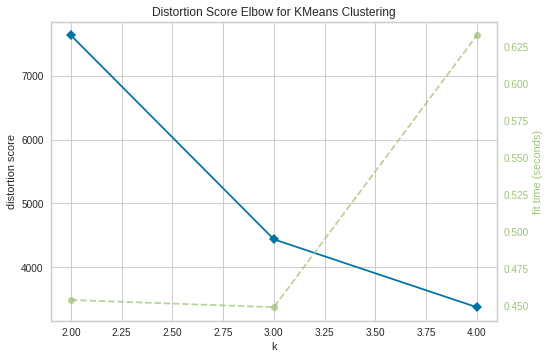

In [45]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=4)
Elbow_M.fit(knndf)
Elbow_M.show()

In [164]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(knndf)
knndf["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
knndf["Clusters"] = yhat_AC

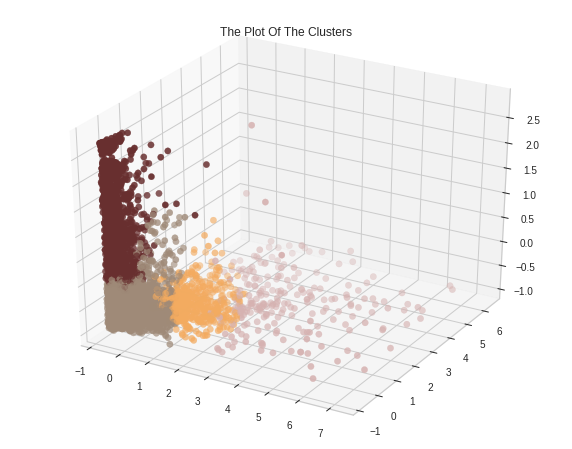

In [50]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
x =knndf["recency"]
y =knndf["frequency"]
z =knndf["monetary"]

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=knndf["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

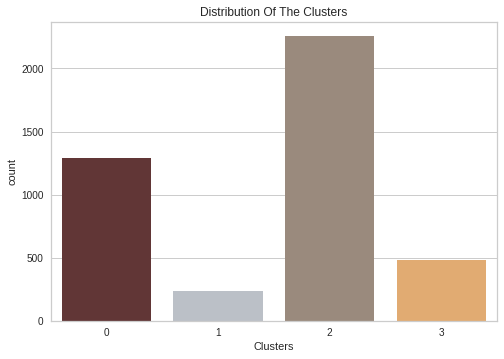

In [52]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=knndf["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

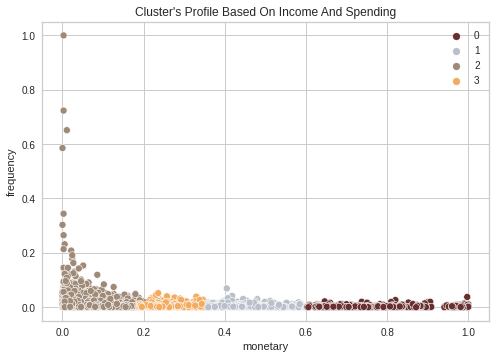

In [ ]:
pl = sns.scatterplot(data = rfmv1,x=rfmv1["monetary"], y=rfmv1["frequency"],hue=rfmv1["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


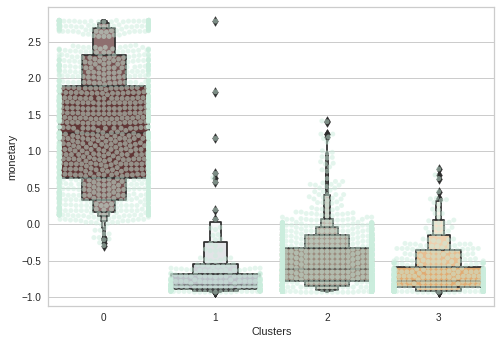

In [54]:
plt.figure()
pl=sns.swarmplot(x=knndf["Clusters"], y=knndf["monetary"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=knndf["Clusters"], y=knndf["monetary"], palette=pal)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


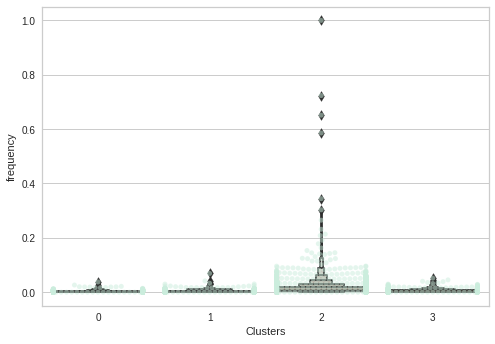

In [ ]:
plt.figure()
pl=sns.swarmplot(x=knndf["Clusters"], y=knndf["frequency"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=knndf["Clusters"], y=knndf["frequency"], palette=pal)
plt.show()

## K-means clustering

In [170]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

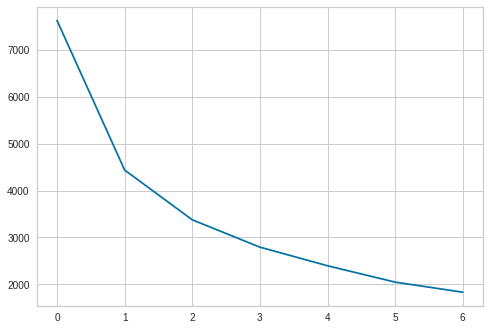

In [171]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [174]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = metrics.silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5408106877061178
For n_clusters=3, the silhouette score is 0.5086416107510932
For n_clusters=4, the silhouette score is 0.4850942708333262
For n_clusters=5, the silhouette score is 0.46670953524976744
For n_clusters=6, the silhouette score is 0.41600533754434305
For n_clusters=7, the silhouette score is 0.4142968085859278
For n_clusters=8, the silhouette score is 0.40614870160594124


In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
# assign the label
rfm_df_scaled['Cluster_Id'] = kmeans.labels_
rfm_df_scaled.head()

monetary  frequency   recency  Cluster_Id
0 -0.913148   1.067832  1.646007           1
1 -0.184527  -0.460601  0.262261           2
2 -0.753450  -0.035474  0.240235           2
3  2.161033  -0.602310 -0.543318           0
4 -0.573790   0.085991  0.652661           2

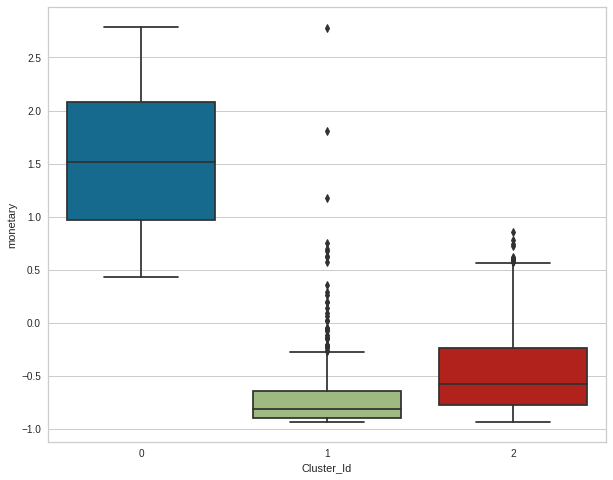

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='monetary', data=rfm_df_scaled)

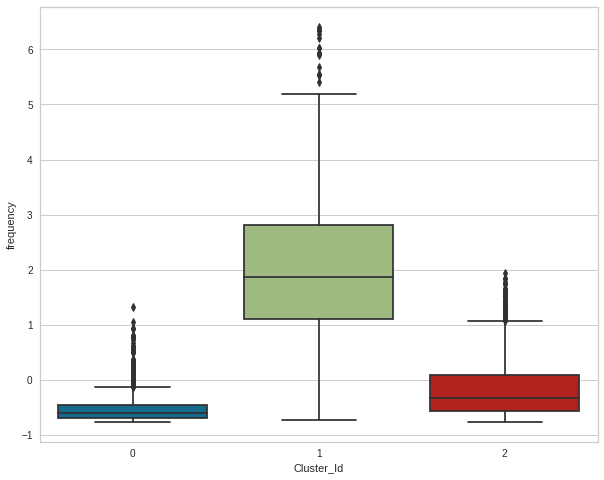

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='frequency', data=rfm_df_scaled)

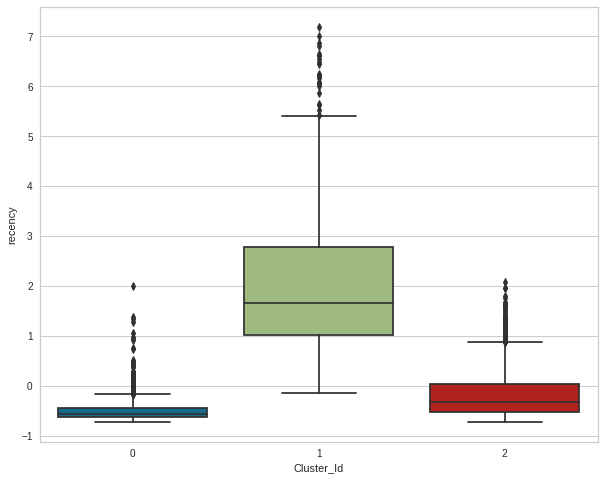

In [ ]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='recency', data=rfm_df_scaled)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


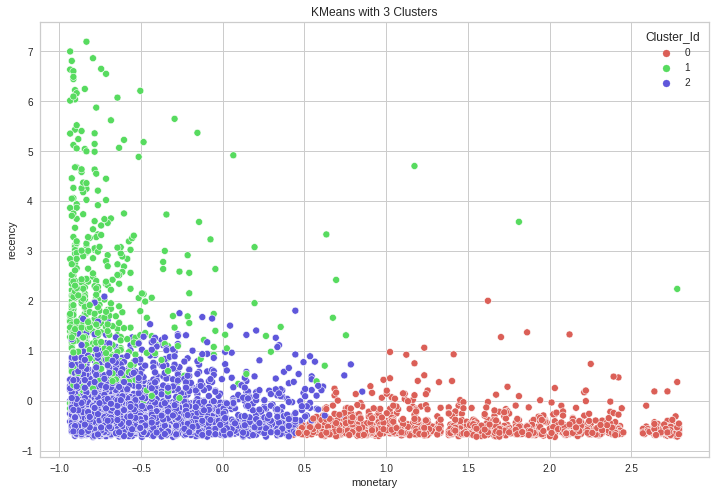

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(rfm_df_scaled['monetary'], rfm_df_scaled['recency'], hue=rfm_df_scaled['Cluster_Id'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


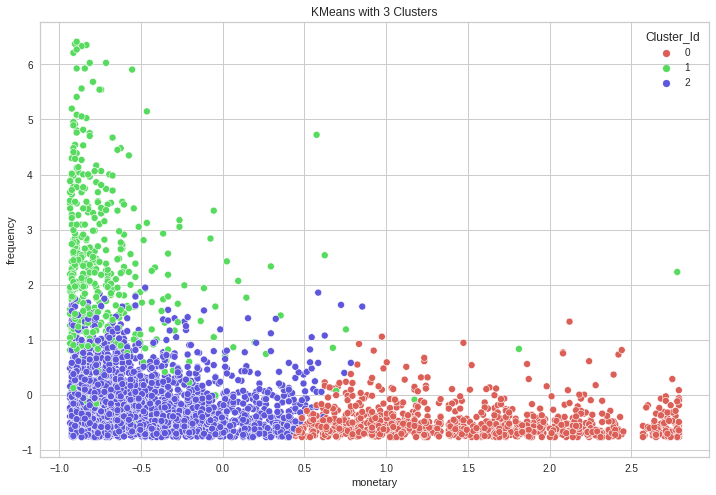

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(rfm_df_scaled['monetary'], rfm_df_scaled['frequency'], hue=rfm_df_scaled['Cluster_Id'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

## Density Based Clustering (DBSCAN)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


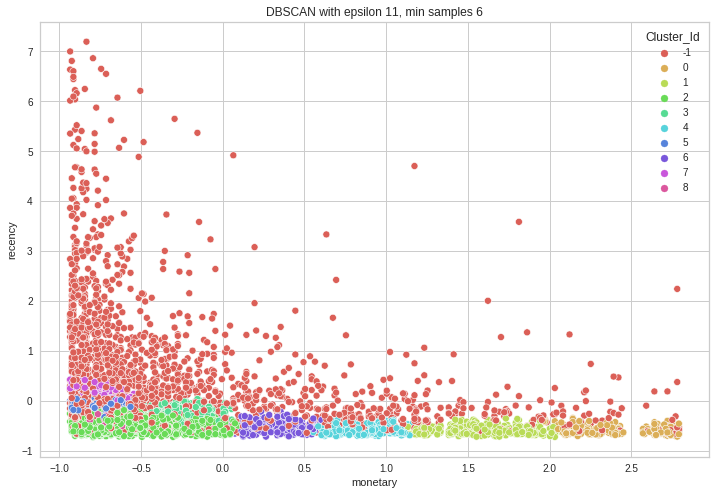

In [157]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=0.20, min_samples=50).fit(rfm_df_scaled)

rfm_df_scaled['Cluster_Id'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(rfm_df_scaled['monetary'], rfm_df_scaled['recency'], hue=rfm_df_scaled['Cluster_Id'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

## Mean Shift Algorithm

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


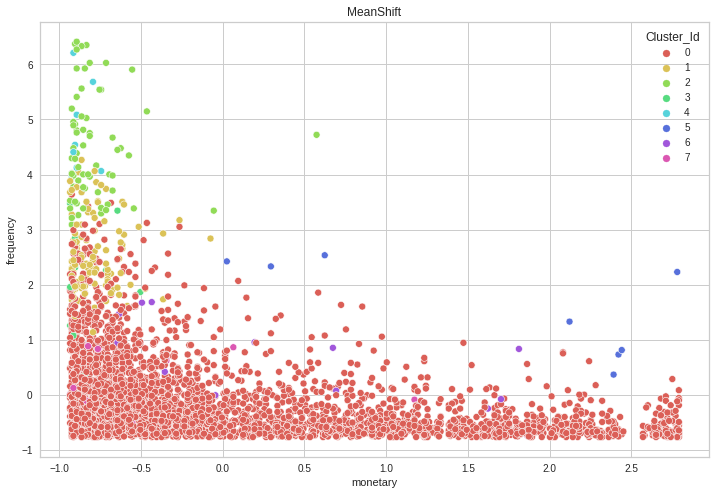

In [73]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import MeanShift
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(rfm_df_scaled, quantile=0.3)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(rfm_df_scaled)

rfm_df_scaled['Cluster_Id'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(rfm_df_scaled['monetary'], rfm_df_scaled['frequency'], hue=rfm_df_scaled['Cluster_Id'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

## Hierarhcial 

# Model Evaluations of Different Algorithms (https://scikit-learn.org/stable/modules/clustering.html)

## Silhouette Score

In [ ]:
# Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(knndf)
knndf["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
rfmv1["Clusters"]= yhat_AC

In [165]:
#Agglemorative
metrics.silhouette_score(knndf, yhat_AC, metric='euclidean')

0.5883575205276966

In [68]:
#K-Means model.  metrics.silhouette_score(knndf, yhat_AC, metric='euclidean')
metrics.silhouette_score(rfm_df_scaled, kmeans.labels_, metric='euclidean')


0.5086416107510932

In [76]:
# Mean shift algorithm
metrics.silhouette_score(rfm_df_scaled, ms.labels_, metric='euclidean')

0.6097775697129691

In [158]:
#DBSCAN
metrics.silhouette_score(rfm_df_scaled, db.labels_, metric='euclidean')

0.5455281993348227

## the Calinski-Harabasz index

If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):

In [166]:
#Agglemorative
metrics.calinski_harabasz_score(knndf, yhat_AC)

5064.789101076235

In [69]:
#Kmeans
metrics.calinski_harabasz_score(rfm_df_scaled, kmeans.labels_)

3994.446213429628

In [117]:
#mean-shift
metrics.calinski_harabasz_score(rfm_df_scaled, ms.labels_)

412.619556650801

In [160]:
#DBSCAN
metrics.calinski_harabasz_score(rfm_df_scaled, db.labels_)

2001.7376722307522

## Davies-Bouldin Index

If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [167]:
#Agglemorative
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(knndf, yhat_AC)

0.7856931351531564

In [70]:
#Kmeans
davies_bouldin_score(rfm_df_scaled, kmeans.labels_)

0.740273305531213

In [78]:
#mean-shift
davies_bouldin_score(rfm_df_scaled, ms.labels_)

0.8549081617198071

In [161]:
#DBSCAN
davies_bouldin_score(rfm_df_scaled, db.labels_)

0.41659547337939307

# Final Thoughts: Problem definition, model inputs&outputs and performance

The main problem this project tackled with is customer segmentation&clustering with RFM analysis via transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. The dataset can be found in: https://archive.ics.uci.edu/ml/datasets/online+retail

Before diving in different clustering algorithms, I started by data preprocessing and cleaning steps in which cancelled transactions and missing entries were dropped. Besides, there were serios outliers that may possibly distort visiualization as well as clustering algorithms to deduce biased results. For this, outliers were removed by interquantile formula of applied statistics. Second, I dealt with feature extraction and created novel features for EDA and clustering purposes: creating features of month, day and year from row date feature; total spend feature via multiplying unit price with quantity for every single transaction; most importantly I calculated recency, frequency, and monetary features for RFM analysis. RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. Because unsupervised clustering algorithms are quite sensitive to variation, I did feature scaling of RFM metrics via standardscalar of sklearn.

Having completed these steps, I conducted comprehensive EDA. In this, I did visualisations for RFM features and quantity, QQ plots of normality, wordclouds on product descriptions to understand what customers of spending more than average bought. Besides, I did wordclouds to get insights on country comparison and why sales boomed in november. What is more, I did monthly and daily(parts of the day)time series analysis to understand at which day periods (i.e. morning etc.) customers had most of their dealing. All of these processes provided interesting results and enriched the analysis. Outstanding conclusions I deduced is the dramatic decrease in transactions during sundays and striking increase in sales during mornings.

In clustering part, my input features were standardized RFM (3 features) scores for every unique customer in the dataset. Accordingly, output features were discreet label values for every customer such as 1 and 2. In this part, I used 4 distinct clustering algorithms: Agglomerative, K-Means, Mean Shift, and DBSCAN by following sckitlearn official website and domain experts on customer segmentation. As evaluation metrics that are mostly used in the domain, I calculated several metrics: Silhoutte Score, the Calinski-Harabasz index, and Davies-Bouldin Index. Performance metrics suggest that Agglemorative clustering with 4 clusters outperforms other algorithms in Silhoutte Score and Calinski-Harabasz index. However, one thing to note is that in agglomerative clustering monetary feature of RFM strongly outweighed recency and frequency features in such that clustering was implemented by single feature.

For interpretable meaningful results, K-means also performed fairly with silhoutte score of 0,50 with 3 clusters. Results of this clustering suggests three interesting customer segments that various marketing techniques can be implemented:
*   One segment of customers go shopping frequently but spend less. Probably they go for low priced products constantly.
*   Another segment of customers have both low frequency of shopping and spending.
*   Last segment on the other hand is consisted of customers spending very high but are not frequent buyers.





